In [1]:
#import all requred libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#load the dataset
df=pd.read_csv("/home/osboxes/Desktop/housingShort_data.csv")
print(df)


      sqft_living         price
0            1234  1.300000e+07
1            1340  3.130000e+05
2            3650  2.384000e+06
3            1930  3.420000e+05
4            2000  4.200000e+05
...           ...           ...
4596         1510  3.081667e+05
4597         1460  5.343333e+05
4598         3010  4.169042e+05
4599         2090  2.034000e+05
4600         1490  2.206000e+05

[4601 rows x 2 columns]


In [3]:
#extract the input values from datasets
x=df.iloc[:,:-1].values
x

array([[1234],
       [1340],
       [3650],
       ...,
       [3010],
       [2090],
       [1490]])

In [4]:
y=df.iloc[:,1].values
y

array([13000000.    ,   313000.    ,  2384000.    , ...,   416904.1667,
         203400.    ,   220600.    ])

In [5]:
#if in case the database is large

print("NaN values are available : ",df.isnull().values.any())
print("there are ",df.isnull().sum(),"NaN values in dataset")


NaN values are available :  False
there are  sqft_living    0
price          0
dtype: int64 NaN values in dataset


In [6]:
#handling the missing data
from sklearn.impute import SimpleImputer

#Imputer object using the mean strategy and missing values types for imputation

imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

#fitting the data to the imputer object 

imputer=imputer.fit(x)

#imputing the data

x=imputer.transform(x)
print("imputed data: ",x)

imputed data:  [[1234.]
 [1340.]
 [3650.]
 ...
 [3010.]
 [2090.]
 [1490.]]


In [7]:
# Handle Categorical data
#no categoriacl data is present

In [8]:

#feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.93983965],
       [-0.82977725],
       [ 1.56875244],
       ...,
       [ 0.90422473],
       [-0.05103384],
       [-0.67402857]])

In [9]:

#splitting the in two part for traing and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(f'x train dataset {x_train.shape}',"\n")
print(f'x test dataset {x_test.shape}',"\n")
print(f'y train dataset {y_train.shape}',"\n")
print(f'y test dataset {y_test.shape}',"\n")

x train dataset (3450, 1) 

x test dataset (1151, 1) 

y train dataset (3450,) 

y test dataset (1151,) 



In [10]:
#train and predict

#trqain the data with machine learning algorithms

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

#predict the data with test samples
y_pred=lr.predict(x_test)

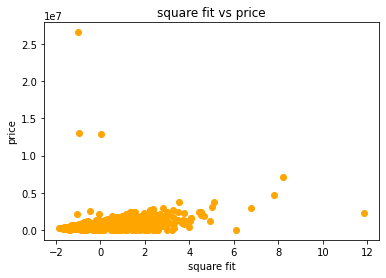

In [11]:
#model visualization
#traing set points
plt.scatter(x_train,y_train,color="orange")
plt.title("square fit vs price")
plt.xlabel("square fit")
plt.ylabel("price")
plt.show()

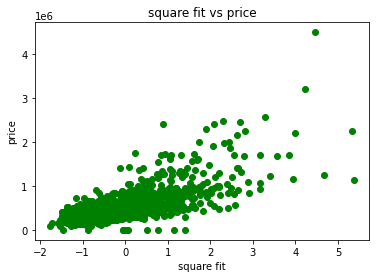

In [12]:
#traing set points
plt.scatter(x_test,y_test,color="green")
plt.title("square fit vs price")
plt.xlabel("square fit")
plt.ylabel("price")
plt.show()

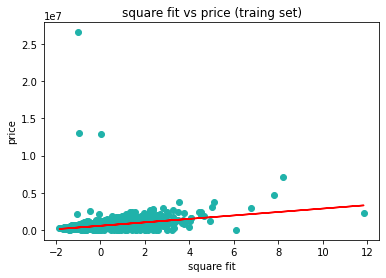

In [13]:
#plot LR(linear regression model ) to the training set.

plt.scatter(x_train,y_train,color="lightseagreen")
plt.plot(x_train,lr.predict(x_train),color="red")
plt.title("square fit vs price (traing set)")
plt.xlabel("square fit")
plt.ylabel("price")
plt.show()

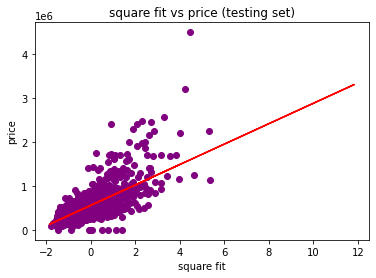

In [17]:
#plot LR(linear regression model ) to the testing set.

plt.scatter(x_test,y_test,color="purple")
plt.plot(x_train,lr.predict(x_train),color="red")
plt.title("square fit vs price (testing set)")
plt.xlabel("square fit")
plt.ylabel("price")
plt.show()

In [15]:
#print the model evaluation result
import sklearn.metrics as metrics

print("Linear Regression")
print("attribute : intr_",lr.intercept_)
print("attribute : coef_",lr.coef_)
print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print("Root MSE : ",np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print("R-square : ",metrics.r2_score(y_test, y_pred))
r_square = metrics.r2_score(y_test, y_pred)
print("Adjusted R-Square",(1 - (1-r_square)*(len(df) - 1) / (len(df) - (df.shape[1] - 1) - 1)))


Linear Regression
attribute : intr_ 557176.4513770333
attribute : coef_ [231747.34234645]
Mean Absolute error :  176294.6587950178
Mean Squared Error : 72343755805.45044
Root MSE :  419.8745750757216
R-square :  0.484329177844267
Adjusted R-Square 0.4842170511162487
